In [61]:
import numpy as np 
import matplotlib.pyplot as plt
import os, pickle
import xarray as xr
from scipy import interpolate

In [75]:
os.environ['WK_DIR'] = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_GFDL.EXP1.2PM.v7.001_2008_2012/etc_composites'
os.environ['OBS_DATA'] = '/localdrive/drive10/jj/mdtf/inputdata/obs_data/etc_composites'
os.environ['POD_HOME'] = '/localdrive/drive10/jj/mdtf/MDTF-diagnostics/diagnostics/etc_composites'
os.environ['CASENAME'] = 'MDTF_GFDL.EXP1.2PM.v7.001'
os.environ['DATADIR'] = '/localdrive/drive10/jj/mdtf/inputdata/model/GFDL.EXP1.2PM.001/'
os.environ['topo_file'] = '/localdrive/drive10/jj/mdtf/inputdata/model/GFDL.EXP1.2PM.001/topo.nc'

In [63]:
## Reading in the model composites
model_file = f"{os.environ['WK_DIR']}/tmp/RUNDIR/tmprun/read_tmprun/composites.pkl"
model_data = pickle.load(open(model_file, 'rb'))

In [64]:
# load in the netcdf files 
obs_file = f"{os.environ['OBS_DATA']}/modis_merra.nc"
era_file = f"{os.environ['OBS_DATA']}/era_interim.nc"

# reading in the observation file
ds = xr.open_dataset(obs_file)
obs_x = ds['X'].values
obs_y = ds['Y'].values
modis_cld = ds['modis_cld'].values
merra_prw = ds['merra_pw'].values
merra_w500 = ds['merra_omega'].values
ds.close()

# reading in the re-analysis file
ds = xr.open_dataset(era_file)
erai_x = ds['X'].values
erai_y = ds['Y'].values
tp_nh_ocean_warm = ds['tp_nh_ocean_warm'].values
prw_nh_ocean_warm = ds['prw_nh_ocean_warm'].values
uv10_nh_ocean_warm = ds['uv10_nh_ocean_warm'].values
w500_nh_ocean_warm = ds['w500_nh_ocean_warm'].values
tp_sh_ocean_warm = ds['tp_sh_ocean_warm'].values
prw_sh_ocean_warm = ds['prw_sh_ocean_warm'].values
uv10_sh_ocean_warm = ds['uv10_sh_ocean_warm'].values
w500_sh_ocean_warm = ds['w500_sh_ocean_warm'].values
ds.close()
# 
# Re-griding the observation data 
## setting up the necessary x,y values in the format required for griddata
obs_x_1d = obs_x.flatten()
obs_y_1d = obs_y.flatten()

modis_cld_1d = modis_cld.flatten()
merra_prw_1d = merra_prw.flatten()
merra_w500_1d = merra_w500.flatten()

## the erai x and y are 1d, have to convert it to a 2d grid
erai_x_grid, erai_y_grid = np.meshgrid(erai_x, erai_y)
erai_x_1d = erai_x_grid.flatten()
erai_y_1d = erai_y_grid.flatten()

# interpolating the ang, dist plots from observations on to the erai standard grid (same grid as the outputs from the model)
erai_modis_cld = interpolate.griddata((obs_x_1d, obs_y_1d), modis_cld_1d, (erai_x_1d, erai_y_1d))
erai_modis_cld = erai_modis_cld.reshape(erai_x_grid.shape)

erai_merra_prw = interpolate.griddata((obs_x_1d, obs_y_1d), merra_prw_1d, (erai_x_1d, erai_y_1d))
erai_merra_prw = erai_merra_prw.reshape(erai_x_grid.shape)

erai_merra_w500 = interpolate.griddata((obs_x_1d, obs_y_1d), merra_w500_1d, (erai_x_1d, erai_y_1d))
erai_merra_w500 = erai_merra_w500.reshape(erai_x_grid.shape)

In [65]:
print(4/3)

1.3333333333333333


/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in true_divide


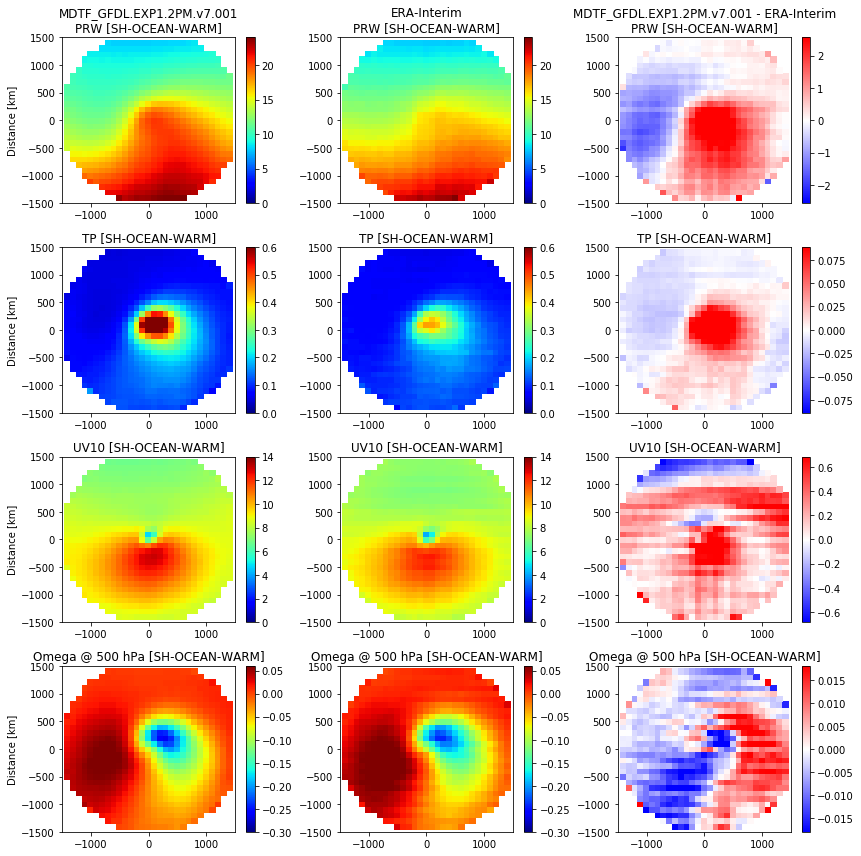

In [66]:
plt.figure(figsize=(12,12))

plt.subplot(4,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=24)
plt.title(f'{os.environ["CASENAME"]}\nPRW [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)
plt.colorbar()

plt.subplot(4,3,2)
plt.pcolormesh(erai_x, erai_y, prw_sh_ocean_warm, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,3)
diff_val = model_val - prw_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,4)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'tp'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=.6)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'TP [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,5)
plt.pcolormesh(erai_x, erai_y, tp_sh_ocean_warm, cmap='jet', vmin=0, vmax=.6)
plt.colorbar()
plt.title('TP [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,6)
diff_val = model_val - tp_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'TP [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,7)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'uv10'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=14)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'UV10 [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,8)
plt.pcolormesh(erai_x, erai_y, uv10_sh_ocean_warm, cmap='jet', vmin=0, vmax=14)
plt.colorbar()
plt.title('UV10 [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,9)
diff_val = model_val - uv10_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'UV10 [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,10)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'w500'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=-.3, vmax=.06)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,11)
plt.pcolormesh(erai_x, erai_y, w500_sh_ocean_warm, cmap='jet', vmin=-.3, vmax=.06)
plt.colorbar()
plt.title('Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(4,3,12)
diff_val = model_val - w500_sh_ocean_warm
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_erai_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.show()
# plt.close('all')


In [67]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'prw'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]}\nPRW [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,2)
tmp = erai_merra_prw.copy()
tmp[np.isnan(model_val)] = np.nan
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=0, vmax=24)
plt.colorbar()
plt.title('ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,3)
diff_val = model_val - erai_merra_prw
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - ERA-Interim\nPRW [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,4)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'w500'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=-.3, vmax=.06)
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,5)
tmp = (erai_merra_w500.copy())
tmp[np.isnan(model_val)] = np.nan
# plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=-.3, vmax=.06)
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(2,3,6)
diff_val = model_val - erai_merra_w500
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'Omega @ 500 hPa [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_merra_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.close('all')



/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


/home/jj/anaconda3/envs/mcms/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


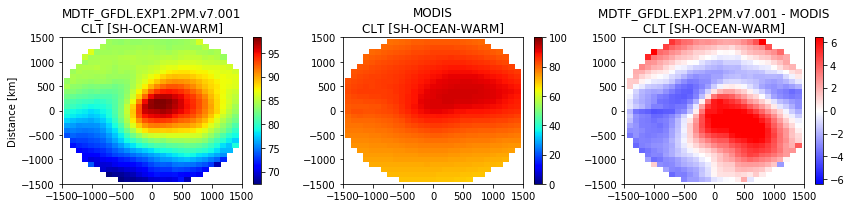

In [68]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
hemis = 'SH'; lo = 'ocean'; season = 'warm'; var = 'clt'
model_val = model_data[hemis][lo][season][var]['area_sum']/model_data[hemis][lo][season][var]['area_cnt']
plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet')
# plt.pcolormesh(erai_x, erai_y, model_val, cmap='jet', vmin=0, vmax=100)
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]}\nCLT [SH-OCEAN-WARM]')
plt.ylabel('Distance [km]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(1,3,2)
tmp = erai_modis_cld.copy()
tmp[np.isnan(model_val)] = np.nan
plt.pcolormesh(erai_x, erai_y, tmp, cmap='jet', vmin=0, vmax=100)
plt.colorbar()
plt.title('MODIS\nCLT [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.subplot(1,3,3)
diff_val = model_val - erai_modis_cld
vmax = np.nanpercentile(np.abs(diff_val).flatten(), 95)
vmin = -1*vmax
plt.pcolormesh(erai_x, erai_y, diff_val, vmin=vmin, vmax=vmax, cmap='bwr')
plt.colorbar()
plt.title(f'{os.environ["CASENAME"]} - MODIS\nCLT [SH-OCEAN-WARM]')
plt.ylim(-1500, 1500)
plt.xlim(-1500, 1500)

plt.tight_layout()
# out_file = f"{os.environ['WK_DIR']}/model/diff_{os.environ['CASENAME']}_modis_vars_SH_ocean_WARM.png"
plt.savefig(out_file)
plt.show()
plt.close('all')



In [42]:
# file = '/localdrive/drive10/jj/mdtf/inputdata/model/GFDL.EXP1.2PM.001/6hr/GFDL.EXP1.2PM.001.CLT.6hr.nc'
file = '/localdrive/drive10/jj/mdtf/wkdir/MDTF_GFDL.EXP1.2PM.v7.001_2008_2012/etc_composites/tmp/data_converts/clt.2008.nc'
ds = xr.open_dataset(file)

In [69]:
ds.clt.isel(time=100).plot()

AttributeError: 'Dataset' object has no attribute 'clt'

# track stats

In [74]:
print(os.path.exists(os.environ['DATADIR']))

False


In [84]:
import sys
sys.path.append('../util/')
os.environ['FIRSTYR'] = '2008'
os.environ['LASTYR'] = '2012'
import defines
import scipy.io as sio
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [87]:
def hist_2d(lon, lat, val=None, bins=None):
  ''' 
  Given lat/lon values, we create a 2d histogram global map. 
  '''

  if (bins is None): 
    # creating my bins
    lat_div = 10.
    lon_div = 10.
    bins = (np.arange(-180, 180+lon_div, lon_div), np.arange(-90, 90+lat_div, lat_div))

  # convert lat and lon into 2d array
  lat = np.array(lat).flatten()
  lon = np.array(lon).flatten()
  lon[lon >= 180.] -= 360. 
  
  # make sure the lens equal each other
  assert(len(lat) == len(lon))
  if (val is not None): 
    val = np.array(val).flatten()
    assert(len(lon) == len(val))

  # bins for the latitude and longitude
  lon_bins = bins[0]
  lat_bins = bins[1]
  lon_mids = lon_bins[:-1] + (lon_bins[1] - lon_bins[0])/2.
  lat_mids = lat_bins[:-1] + (lat_bins[1] - lat_bins[0])/2.

  H_cnts, x, y = np.histogram2d(lon, lat, bins=bins)
  if (val is None): 
    H_sums = H_cnts
  else:
    H_sums, x, y = np.histogram2d(lon, lat, bins=bins, weights=val)

  return {'cnts': H_cnts.T, 'sums': H_sums.T, 'lon': lon_mids, 'lat': lat_mids}

def global_map(ax=None):
  '''Create a global map for plotting the figures.'''
  if (ax is None):
    plt.style.use('seaborn-talk')
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
  else:
    ax.coastlines(lw=1.)
    ax.set_extent([-180, 180, -90, 90])
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, lw=2., color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
    gl.ylocator = mticker.FixedLocator([-90, -45, 0, 45, 90])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

  return ax

def read_tracks(year): 
  '''Reading in tracks for a given year'''
  in_file = os.path.join(defines.read_folder, f'{defines.model}_{year}.mat')
  tracks = sio.loadmat(in_file)
  return tracks['cyc'][0]

def plot_2d(ax, x, y, z): 
  cf = ax.contourf(x, y, z)
  cf = ax.colorbar(cax=cax)

def get_data(tracks):

  g_lat = []
  g_lon = []
  g_slp = []
  l_lat = []
  l_lon = []
  l_slp = []
  lat = []
  lon = []
  slp = []
  for track in tracks:

    # lysiss
    l_lat.append(track['fulllat'][0][0])
    l_lon.append(track['fulllon'][0][0])
    l_slp.append(track['fullslp'][0][0])
    
    # genesis
    g_lat.append(track['fulllat'][0][-1])
    g_lon.append(track['fulllon'][0][-1])
    g_slp.append(track['fullslp'][0][-1])
    
    # all
    lat.extend(track['fulllat'][0].tolist())
    lon.extend(track['fulllon'][0].tolist())
    slp.extend(track['fullslp'][0].tolist())

  return {'genesis': {'lat': g_lat, 'lon': g_lon, 'slp': g_slp}, \
      'lysis': {'lat': l_lat, 'lon': l_lon, 'slp': l_slp}, \
      'all': {'lat': lat, 'lon': lon, 'slp': slp}}

def track_density_2d(lon, lat, ax=None):
  H = hist_2d(lon, lat)
  if (ax is not None): 
    # levels=np.arange(0, 0.004, 0.0001)
    levels=10 # cuz I don't know the range of the colorbar
    cf = ax.contourf(H['lon'], H['lat'], H['cnts']/np.sum(H['cnts']), cmap='jet', levels=levels, extend='max')
    cb = plt.colorbar(cf, ax=ax, shrink=0.5, extend='max')
  return H

def track_feature_density_2d(lon, lat, ax=None):
  H = hist_2d(lon, lat)
  if (ax is not None): 
    levels=np.arange(0, 0.004, 0.0001)
    cf = ax.contourf(H['lon'], H['lat'], H['cnts']/np.sum(H['cnts']), cmap='jet', levels=levels, extend='max')
    cb = plt.colorbar(cf, ax=ax, shrink=0.5, extend='max')
  return H

In [94]:
############### main test code #################

# check if mat file exists, if not run the mat file creator code
mat_file = os.path.join(defines.read_folder, f'{defines.model}_{defines.over_write_years[0]}.mat') 
if (not os.path.exists(mat_file)):
  print('No MAT file, create the mat file from tracker output')
  os.system('python3 main_create_dict.py')


# Defining the bins
lat_div = 10.
lon_div = 10.
bins = (np.arange(-180, 180+lon_div, lon_div), np.arange(-90, 90+lat_div, lat_div))
lon_mids = bins[0][:-1] + (bins[0][1] - bins[0][0])/2.
lat_mids = bins[1][:-1] + (bins[1][1] - bins[1][0])/2.

# initializing dict that I need
init_shape = (len(lat_mids), len(lon_mids))
stats = {}
for stat_type in ['all', 'genesis', 'lysis']:
  stats[stat_type] = {}
  if (stat_type == 'all'):
    stats[stat_type]['feature_density'] = np.zeros(init_shape)
    stats[stat_type]['track_density'] = np.zeros(init_shape)
  else:
    stats[stat_type] = np.zeros(init_shape)

g_lon = []
g_lat = []
l_lon = []
l_lat = []
# loop through all the years and save the tracks
for year in range(defines.over_write_years[0], defines.over_write_years[1]+1):
  tracks = read_tracks(year)
  for track in tracks: 
    lon = np.squeeze(track['fulllon'])
    lat = np.squeeze(track['fulllat'])

    # considering only lat cases between -60 and 60
    ind = (np.abs(lat) < 60)
    if (not np.any(ind)): 
      continue
    lon = lon[ind]
    lat = lat[ind]

    l_lon.append(lon[-1])
    l_lat.append(lat[-1])
    g_lon.append(lon[0])
    g_lat.append(lat[0])

    # feature density
    H = hist_2d(lon, lat, bins=bins)

    #  feature density - count all occurences
    stats['all']['feature_density'] += H['cnts']
    stats['all']['track_density'] += np.double(H['cnts'] > 0)

# lysis
H = hist_2d(l_lon, l_lat)
stats['lysis'] = H['cnts']

# genesis
H = hist_2d(g_lon, g_lat)
stats['genesis'] = H['cnts']

# normalizing all the global histograms
stats['genesis'] /= np.nansum(stats['genesis'])
stats['lysis'] /= np.nansum(stats['lysis'])
stats['all']['feature_density'] /= np.nansum(stats['all']['feature_density'])
stats['all']['track_density'] /= np.nansum(stats['all']['track_density'])

# Creating the necessary plots
# track density
plt.close('all')

out_file = os.path.join(defines.model_images_folder, f"{os.environ['CASENAME']}_track_stats.png")
cmap = 'jet'

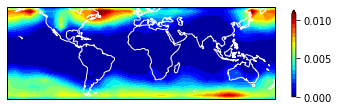

In [110]:
plt.figure()
ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
cf = ax.contourf(lon_mids, lat_mids, stats['all']['feature_density'], cmap=cmap, extend='max', levels=levels)
ax.coastlines(color='w')
ax.set_ylim(-60, 60)
cbar = plt.colorbar(cf, ax=ax, shrink=0.4, ticks=np.arange(0, 0.015, 0.005))


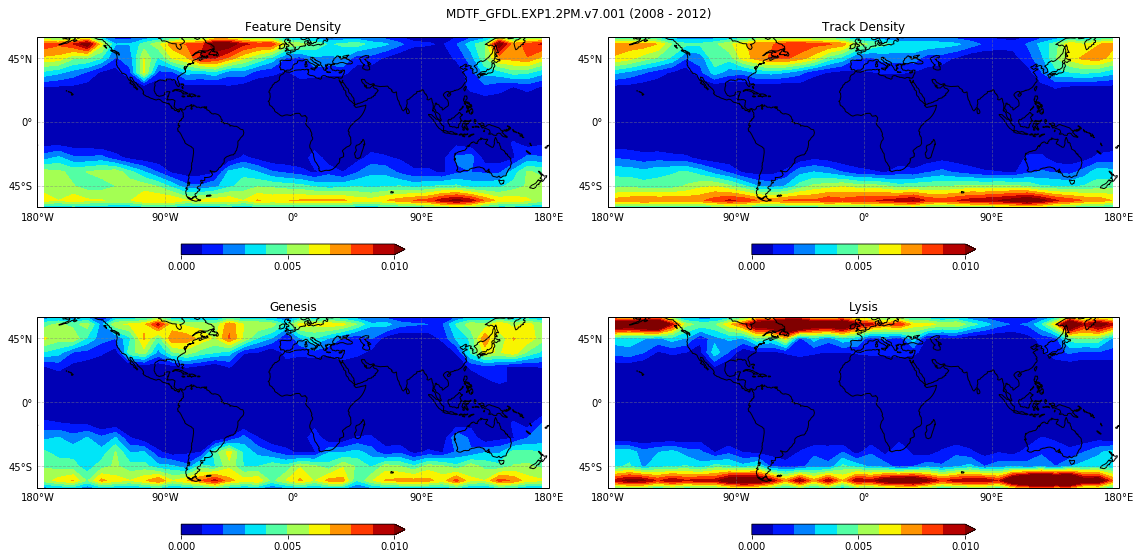

In [120]:
# creating the 2x2 plot
fig, axes = plt.subplots(ncols=2, nrows=2, subplot_kw={'projection': cartopy.crs.PlateCarree()}, figsize=(16,8))

ax = global_map(axes[0, 0])
# levels = np.linspace(0, 0.0025, 10)
# levels = np.linspace(0, 0.01, 10)
levels = 10
levels = np.arange(0, 0.011, 0.001)
ax.set_title(f'Feature Density')
cf = ax.contourf(lon_mids, lat_mids, stats['all']['feature_density'], cmap=cmap, extend='max', levels=levels)
ax.set_ylim(-60, 60)
plt.colorbar(cf, ax=ax, shrink=0.4, ticks=np.arange(0, 0.015, 0.005), orientation='horizontal')

ax = global_map(axes[0, 1])
ax.set_title(f'Track Density')
# levels = np.linspace(0, 0.0025, 10)
# levels = np.linspace(0, 0.005, 10)
levels = 10
levels = np.arange(0, 0.011, 0.001)
cf = ax.contourf(lon_mids, lat_mids, stats['all']['track_density'], cmap=cmap, extend='max', levels=levels)
ax.set_ylim(-60, 60)
plt.colorbar(cf, ax=ax, shrink=0.4, ticks=np.arange(0, 0.015, 0.005), orientation='horizontal')

ax = global_map(axes[1, 0])
ax.set_title(f'Genesis')
levels = np.linspace(0, 0.0025, 10)
levels = 10
levels = np.arange(0, 0.011, 0.001)
cf = ax.contourf(lon_mids, lat_mids, stats['genesis'], cmap=cmap, extend='max', levels=levels)
ax.set_ylim(-60, 60)
plt.colorbar(cf, ax=ax, shrink=0.4, ticks=np.arange(0, 0.015, 0.005), orientation='horizontal')

ax = global_map(axes[1, 1])
ax.set_title(f'Lysis')
levels = np.linspace(0, 0.0025, 10)
levels = 10
levels = np.arange(0, 0.011, 0.001)
cf = ax.contourf(lon_mids, lat_mids, stats['lysis'], cmap=cmap, extend='max', levels=levels)
ax.set_ylim(-60, 60)
plt.colorbar(cf, ax=ax, shrink=0.4, ticks=np.arange(0, 0.015, 0.005), orientation='horizontal')

plt.suptitle(f'{os.environ["CASENAME"]} ({defines.over_write_years[0]} - {defines.over_write_years[1]})')
plt.tight_layout()
# plt.savefig(out_file, dpi=300.)
# plt.close('all')
plt.show()

# import pickle
# out_file = os.path.join(os.environ['WK_DIR'], 'track_stats.pkl')
# out_struct = {'lon': lon_mids, 'lat': lat_mids, 'stats': stats}
# pickle.dump(out_struct, open(out_file, 'wb'))